Y-Intercept: -9.557995132484805
First regression coefficient (Slope): 5.318347439396567


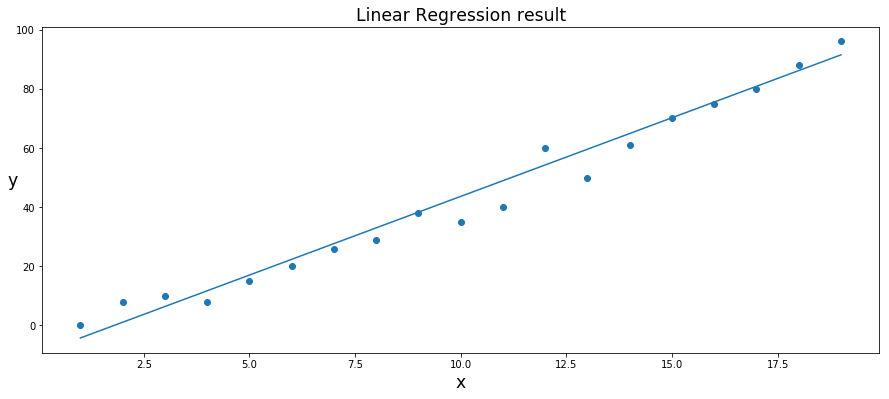

In [28]:
# Linear Regression from scratch
# Dependencies
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt

# Dataset
xs = np.array(range(1,20))
ys = [0,8,10,8,15,20,26,29,38,35,40,60,50,61,70,75,80,88,96]

# Create mapping of data
data = dict()
for i in range(1,20):
    data.update({xs[i-1] : ys[i-1]})

# Hyperparameters
learning_rate = 0.001
epochs = 100000

# Linear Regression
def linear_regression(data : dict, learning_rate : float, epochs : int) -> tuple:
    '''
    Fits a line to data and returns parameters.
    
    Arguments: 
    A data dictionary, learning rate and epoch count.
    
    Returns:
    A tuple with two parameters of the fitted line. The y-intercept and the first regression coefficient
    '''
    m = 0 # Y-intercept
    b = 0 # First regression coefficient
    
    # Linear Regression
    for i in range(epochs):
        # Pick a random point
        rand_point = random.choice(list(data.items()))
    
        # Measure vertical and horizontal distance of point from the line
        vert_dist = abs((m * rand_point[0] + b) - rand_point[1])
        hor_dist = rand_point[0]

        # Adjust the line towards the point by adjusting m and b
        if (m * rand_point[0] + b) - rand_point[1] < 0:
            m += learning_rate * vert_dist * hor_dist
            b += learning_rate * vert_dist
        else:
            m -= learning_rate * vert_dist * hor_dist
            b -= learning_rate * vert_dist
    
    return m, b

def linear_equation(x : list, parameters : tuple) -> list:
    '''
    Function for a linear equation.
    
    Arguments:
    A list of x values and linear parameters.
    
    Returns:
    A list of corresponding y values.
    '''
    return list(parameters[0] * x + parameters[1])  

# Fit a line on the data
parameters = linear_regression(data, learning_rate, epochs)

# Plot data and regression line
plt.figure(figsize=(15,6))
plt.scatter(data.keys(), data.values())
plt.plot(xs, linear_equation(xs, parameters))
plt.title('Linear Regression result', fontsize='xx-large') 
plt.xlabel('x', fontsize='xx-large')
plt.ylabel('y', fontsize='xx-large', rotation=0)
print('Y-Intercept: {}\nFirst regression coefficient (Slope): {}'.format(parameters[1], 
                                                                         parameters[0]))